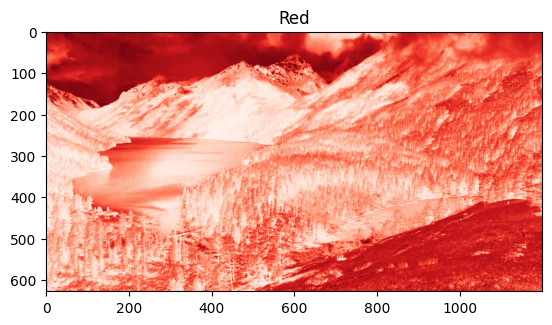

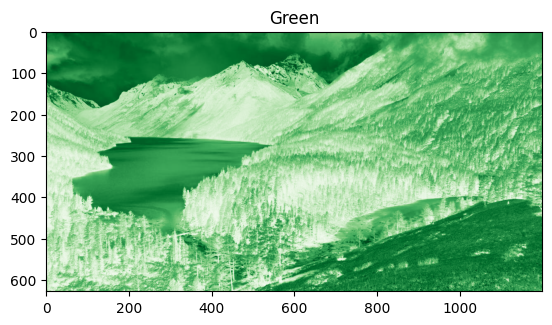

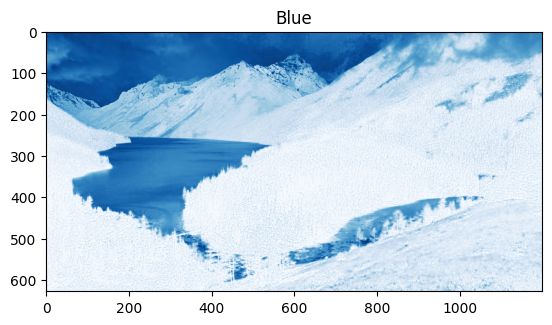

: 

In [ ]:
# bài 1
from PIL import Image
import numpy as np
import imageio.v2 as iio
from PIL import Image
import matplotlib.pyplot as plt

data = iio.imread('scence.png')


rdata = data[:, :, 0]
plt.imshow(rdata, cmap='Reds')  
plt.title("Red")
plt.show()


gdata = data[:, :, 1]
plt.imshow(gdata, cmap='Greens')
plt.title("Green")
plt.show()


bdata = data[:, :, 2]
plt.imshow(bdata, cmap='Blues')
plt.title("Blue")
plt.show()


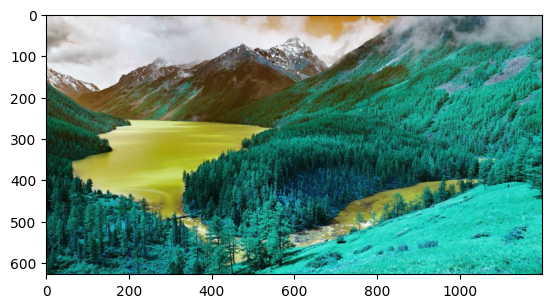

In [12]:
#bài 2
import imageio.v2 as iio
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh gốc
img = iio.imread('scence.png')  


rgb_to_grb = img[:, :, [1, 0, 2]]  
rgb_to_bgr = img[:, :, [2, 1, 0]]  
rgb_to_brg = img[:, :, [2, 0, 1]]  

# Lưu các ảnh sau khi hoán đổi
iio.imsave('scence_grb.png', rgb_to_grb)
iio.imsave('scence_bgr.png', rgb_to_bgr)
iio.imsave('scence_brg.png', rgb_to_brg)

# Hiển thị thử 1 ảnh
plt.imshow(rgb_to_bgr)
plt.show()


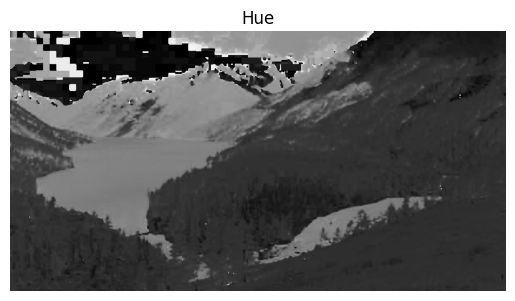

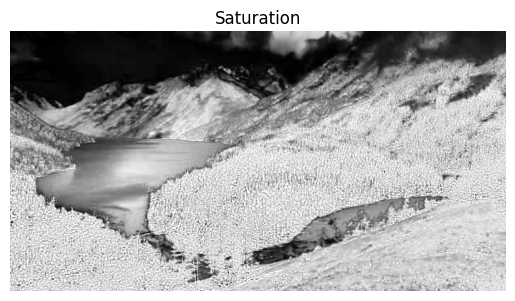

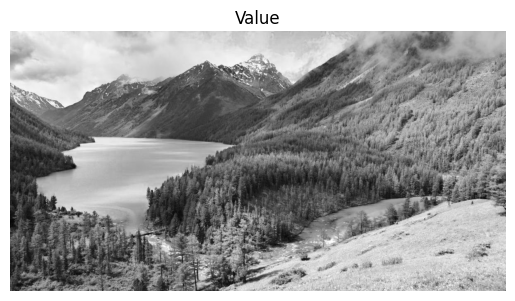

In [ ]:
#bài 3
import imageio.v2 as iio
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

img = iio.imread('scence.png') / 255.0  
if img.shape[-1] == 4: 
    img = img[..., :3]

hsv = mcolors.rgb_to_hsv(img)

H = hsv[..., 0]
S = hsv[..., 1]
V = hsv[..., 2]


iio.imwrite('hue.png', (H * 255).astype(np.uint8))
iio.imwrite('saturation.png', (S * 255).astype(np.uint8))
iio.imwrite('value.png', (V * 255).astype(np.uint8))


for channel, name in zip([H, S, V], ['Hue', 'Saturation', 'Value']):
    plt.imshow(channel, cmap='gray')
    plt.title(name)
    plt.axis('off')
    plt.show()


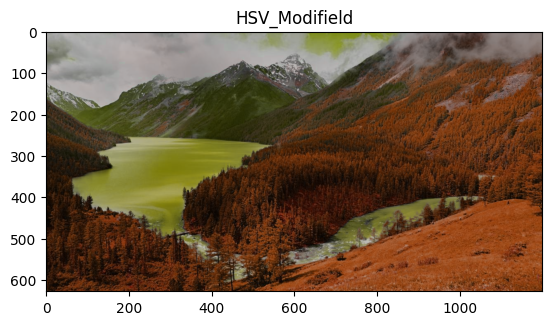

In [ ]:
# Bài 4
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
import colorsys
from PIL import Image


rgb = iio.imread('scence.png').astype(np.float32) / 255.0


rgb2hsv = np.vectorize(colorsys.rgb_to_hsv)
h, s, v = rgb2hsv(rgb[:,:,0], rgb[:,:,1], rgb[:,:,2])


h = (1/3) * h
v = (3/4) * v


h = np.clip(h, 0, 1)
v = np.clip(v, 0, 1)


hsv2rgb = np.vectorize(colorsys.hsv_to_rgb)
r, g, b = hsv2rgb(h, s, v)


rgb_new = np.stack([r, g, b], axis=2)
rgb_new_uint8 = (rgb_new * 255).astype(np.uint8)


img_out = Image.fromarray(rgb_new_uint8)
img_out.save('hsv_modified.png')


plt.imshow(rgb_new)
plt.title("HSV_Modifield")
plt.show()


[[181 177 175 ... 163 149 134]
 [181 177 176 ... 158 146 136]
 [174 174 173 ... 161 155 146]
 ...
 [174 170 168 ... 139 135 125]
 [176 170 166 ... 137 134 125]
 [168 164 165 ... 142 137 129]]


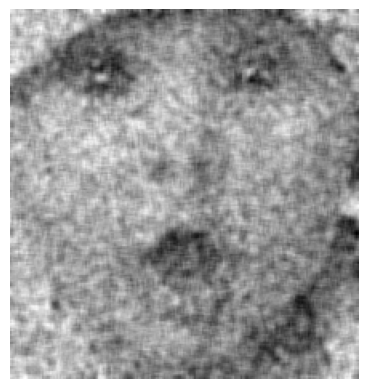

[[155 167 154 ... 184 191 193]
 [157 165 155 ... 183 190 192]
 [156 163 148 ... 190 200 201]
 ...
 [ 60  73  58 ...  84  77  74]
 [ 47  60  52 ...  77  64  62]
 [ 62  68  53 ...  73  63  58]]


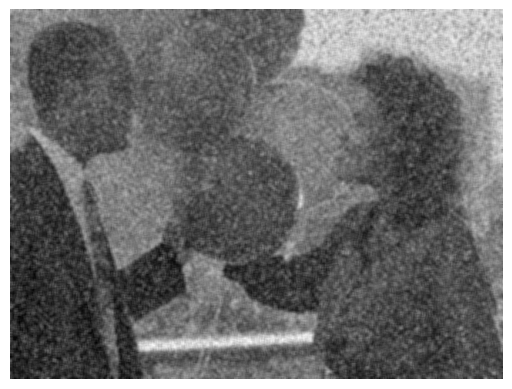

[[42 40 46 ... 70 71 69]
 [40 39 45 ... 69 70 67]
 [40 40 45 ... 69 70 69]
 ...
 [51 47 47 ... 53 43 37]
 [58 53 53 ... 41 35 33]
 [63 58 57 ... 34 31 31]]


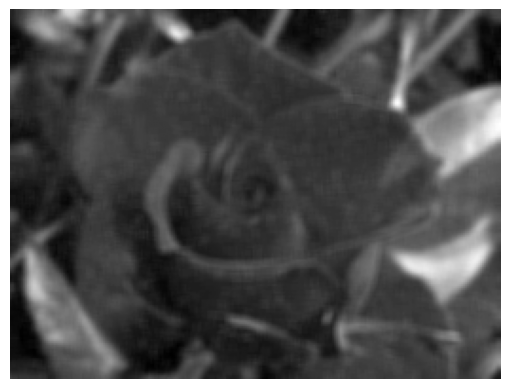

In [ ]:
# Bài 5
import numpy as np
import imageio.v2 as iio
from scipy import ndimage as sn
from skimage.color import rgb2gray
import matplotlib.pyplot as plt


a_rgb = iio.imread('baby.jpeg')
x_rgb = iio.imread('balloons_noisy.png')
z_rgb = iio.imread('flower.jpeg')


a = (rgb2gray(a_rgb) * 255).astype(np.uint8)
x = (rgb2gray(x_rgb) * 255).astype(np.uint8)
z = (rgb2gray(z_rgb) * 255).astype(np.uint8)


k = np.ones((5, 5)) / 25
b = sn.convolve(a, k).astype(np.uint8)
c = sn.convolve(x, k).astype(np.uint8)
d = sn.convolve(z, k).astype(np.uint8)


iio.imsave('baby_mean_filter.jpeg', b)
print(b)
plt.imshow(b, cmap='gray')
plt.axis('off')
plt.show()

iio.imsave('balloons_noisy_mean_filter.png', c)
print(c)
plt.imshow(c, cmap='gray')
plt.axis('off')
plt.show()

iio.imsave('flower_mean_filter.jpeg', d)
print(d)
plt.imshow(d, cmap='gray')
plt.axis('off')
plt.show()
